In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
def gini(x):
    # (Warning: This is a concise implementation, but it is O(n**2)
    # in time and memory, where n = len(x).  *Don't* pass in huge
    # samples!)

    # Mean absolute difference
    mad = np.abs(np.subtract.outer(x, x)).mean()
    # Relative mean absolute difference
    rmad = mad/np.mean(x)
    # Gini coefficient
    g = 0.5 * rmad
    return g

def shap_cobb_doug(theta,bet0,bet1):
    return .5*(bet0+bet1)**theta+.5*bet0**theta-.5*bet1**theta

In [17]:
def yard_sale(sample_size,beta,sample_length):
    wealth = sample_size*[1]

    for _ in range(0,sample_length):
        selected = np.random.randint(0,sample_size,2)
        prize = beta*min(wealth[selected[0]], wealth[selected[1]])

        winner = np.random.randint(0,2)
        loser = (winner+1) % 2

        wealth[selected[winner]] = wealth[selected[winner]] + prize
        wealth[selected[loser]] = wealth[selected[loser]] - prize

    return wealth

def shap_sale(sample_size,theta,sample_length):
    wealth = sample_size*[1]

    for _ in range(0,sample_length):
        selected = np.random.randint(0,sample_size,2)
        prize_0 = shap_cobb_doug(theta, wealth[selected[0]], wealth[selected[1]])
        prize_1 = shap_cobb_doug(theta, wealth[selected[1]], wealth[selected[0]])

        wealth[selected[0]] = wealth[selected[0]] + prize_0
        wealth[selected[1]] = wealth[selected[1]] + prize_1

    return wealth


0.9508659869240759


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000163452A58E0>]],
      dtype=object)

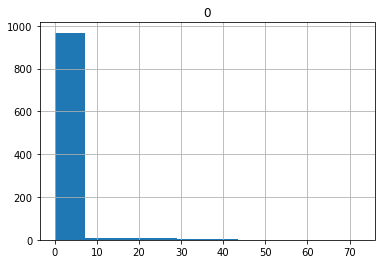

In [22]:
sims = yard_sale(1000,.5,100000)
print(gini(sims))
pd.DataFrame(sims).hist()

0.09640732714212306


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001634412DE50>]],
      dtype=object)

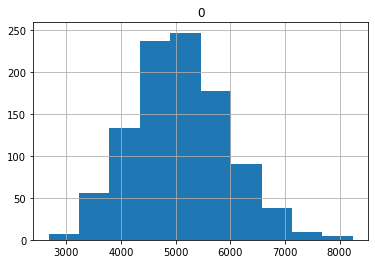

In [23]:
sims = shap_sale(1000,.5,100000)
print(gini(sims))
pd.DataFrame(sims).hist()